In [ ]:
# Install any required packages (if needed)
!pip install seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the CSV file
df = pd.read_csv('customer_satisfaction_survey.csv')


Saving customer_satisfaction_survey.csv to customer_satisfaction_survey.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 100 non-null    int64
 1   Gender              100 non-null    int64
 2   Service_Quality     100 non-null    int64
 3   Product_Quality     100 non-null    int64
 4   Support_Experience  100 non-null    int64
 5   Wait_Time           100 non-null    int64
 6   Staff_Behavior      100 non-null    int64
 7   Price_Satisfaction  100 non-null    int64
 8   Satisfaction        100 non-null    int64
dtypes: int64(9)
memory usage: 7.2 KB


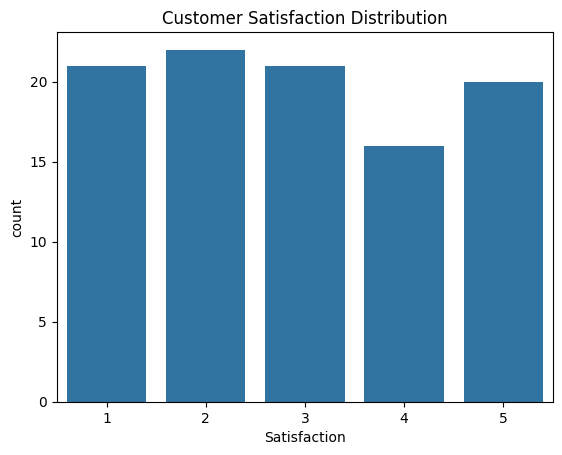

<Axes: >

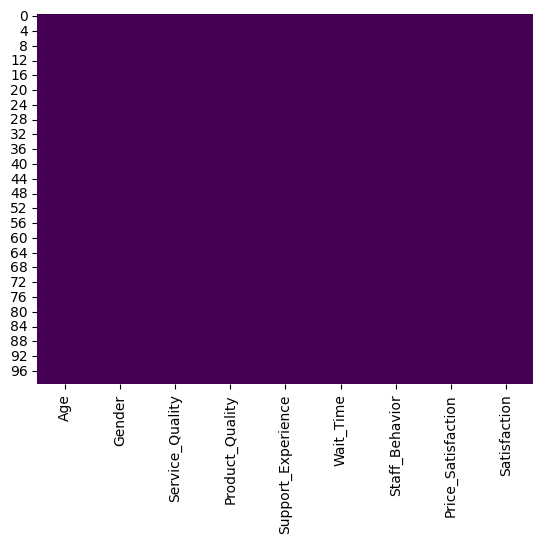

In [ ]:
# Preview the dataset
df.head()
df.info()
df.describe()
df.isnull().sum()

# Plot distribution of target variable
sns.countplot(data=df, x='Satisfaction')
plt.title("Customer Satisfaction Distribution")
plt.show()

# Visualize missing data (if any)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')



First 5 rows:
   Age  Gender  Service_Quality  Product_Quality  Support_Experience  \
0   56       0                1                1                   2   
1   46       0                1                4                   2   
2   32       1                1                4                   1   
3   60       1                1                3                   4   
4   25       1                3                1                   2   

   Wait_Time  Staff_Behavior  Price_Satisfaction  Satisfaction  
0         43               5                   4             3  
1         44               5                   4             1  
2         29               2                   5             5  
3         13               2                   1             5  
4         12               2                   4             4  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtyp

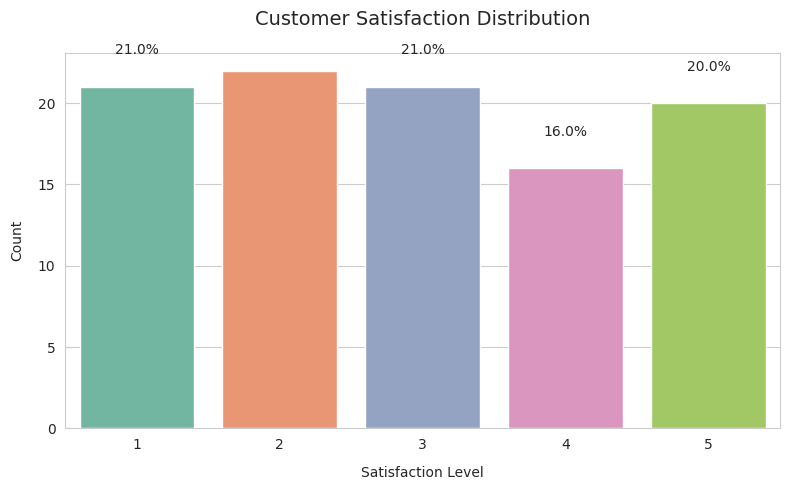


No missing values found in the dataset.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set_style("whitegrid")

# 1. Preview the dataset
print("="*50)
print("First 5 rows:")
print(df.head())

print("\n" + "="*50)
print("Dataset Info:")
print(df.info())

print("\n" + "="*50)
print("Statistical Summary:")
print(df.describe(include='all'))  # Include categorical & numerical

print("\n" + "="*50)
print("Missing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])  # Only show columns with missing values

# 2. Plot distribution of target variable
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Satisfaction', palette="Set2")
plt.title("Customer Satisfaction Distribution", pad=20, fontsize=14)
plt.xlabel("Satisfaction Level", labelpad=10)
plt.ylabel("Count", labelpad=10)

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02 * total
    ax.annotate(percentage, (x, y), ha='center')

plt.tight_layout()
plt.show()

# 3. Visualize missing data (if any)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis',
                yticklabels=False, alpha=0.7)
    plt.title("Missing Data Visualization", pad=20, fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found in the dataset.")

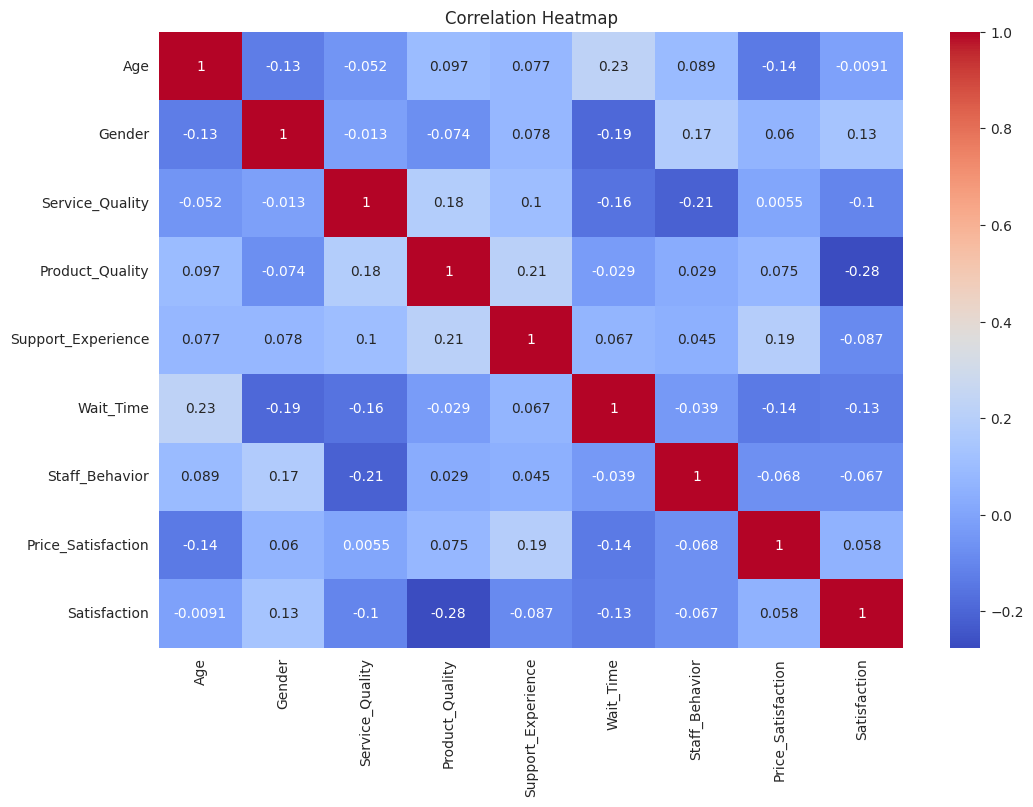

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


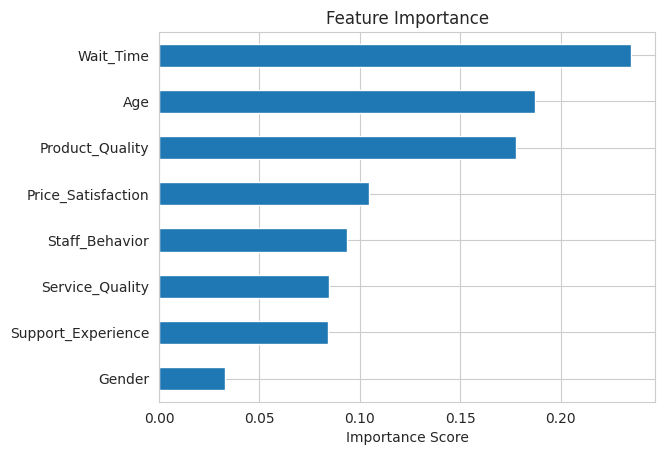

In [ ]:
X = df_scaled.drop('Satisfaction', axis=1)
y = df_scaled['Satisfaction']

rf_model = RandomForestRegressor()
rf_model.fit(X, y)

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.xlabel('Importance Score')
plt.show()


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (Linear Regression)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation metrics
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: -0.09931014628751744
Mean Squared Error: 1.648965219431276


In [ ]:
# Top drivers based on feature importance
top_features = importances.sort_values(ascending=False)
print("Top 3 Key Drivers of Customer Satisfaction:")
print(top_features.head(3))


Top 3 Key Drivers of Customer Satisfaction:
Wait_Time          0.235266
Age                0.187307
Product_Quality    0.177808
dtype: float64
